<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C/2025_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
path = '/content/drive/MyDrive/data/'
files = glob.glob(path + '*20*.csv')
files

['/content/drive/MyDrive/data/2019년 소비자행태조사 원시데이터_답변.csv',
 '/content/drive/MyDrive/data/2018년 소비자행태조사 원시데이터_답변.csv',
 '/content/drive/MyDrive/data/2017년 소비자행태조사 원시데이터_답변.csv']

In [ ]:
##  추출할 컬럼
selected_cols = ['A_001', 'A_003', 'A_006', 'A_007', 'A_016', 'A_019',
       'A_027', 'B_03_026', 'B_03_027', 'C_01_001#1', 'C_01_001#2', 'C_01_024']

In [ ]:
ques_items = glob.glob(path + '*20*.xlsx')
ques_items

['/content/drive/MyDrive/data/2018년 소비자행태조사 원시데이터_문항,보기.xlsx',
 '/content/drive/MyDrive/data/2019년 소비자행태조사 원시데이터_문항,보기.xlsx',
 '/content/drive/MyDrive/data/2017년 소비자행태조사 원시데이터_문항,보기.xlsx']

In [ ]:
# prompt: ques_items의 3개 파일의 항목ID가 cols에 해당되는 것을 모두 불러 3개를 비교하여 같으 ㄴ지확인

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Read the 3 xlsx files into dataframes
df1 = pd.read_excel(ques_items[0]).set_index('항목ID')
df2 = pd.read_excel(ques_items[1]).set_index('항목ID')
df3 = pd.read_excel(ques_items[2]).set_index('항목ID')

In [ ]:
# prompt: df1.df2,df3의  index가 cols에 해당되는 것만 추출하여 항목명 컬럼만 비교하라

import pandas as pd
# Filter the dataframes to keep only the rows where the index is in 'cols'
df1_filtered = df1.loc[selected_cols]
df2_filtered = df2.loc[selected_cols]
df3_filtered = df3.loc[selected_cols]
'''
# Extract the '항목명' column from each filtered dataframe
항목명_df1 = df1_filtered['항목명']
항목명_df2 = df2_filtered['항목명']
항목명_df3 = df3_filtered['항목명']

# Compare the '항목명' columns (you can choose how to compare, e.g., equality)
# Here, we'll check if the '항목명' column is the same across all three dataframes for the selected indices
comparison_result_2_vs_1 = 항목명_df2.equals(항목명_df1)
comparison_result_3_vs_1 = 항목명_df3.equals(항목명_df1)
comparison_result_3_vs_2 = 항목명_df3.equals(항목명_df2)

# You can also create a new dataframe to see the '항목명' side by side
compared_항목명 = pd.DataFrame({
    'df1_항목명': 항목명_df1,
    'df2_항목명': 항목명_df2,
    'df3_항목명': 항목명_df3
})
print("\nCompared '항목명' for the selected indices:")
compared_항목명
'''

'\n# Extract the \'항목명\' column from each filtered dataframe\n항목명_df1 = df1_filtered[\'항목명\']\n항목명_df2 = df2_filtered[\'항목명\']\n항목명_df3 = df3_filtered[\'항목명\']\n\n# Compare the \'항목명\' columns (you can choose how to compare, e.g., equality)\n# Here, we\'ll check if the \'항목명\' column is the same across all three dataframes for the selected indices\ncomparison_result_2_vs_1 = 항목명_df2.equals(항목명_df1)\ncomparison_result_3_vs_1 = 항목명_df3.equals(항목명_df1)\ncomparison_result_3_vs_2 = 항목명_df3.equals(항목명_df2)\n\n# You can also create a new dataframe to see the \'항목명\' side by side\ncompared_항목명 = pd.DataFrame({\n    \'df1_항목명\': 항목명_df1,\n    \'df2_항목명\': 항목명_df2,\n    \'df3_항목명\': 항목명_df3\n})\nprint("\nCompared \'항목명\' for the selected indices:")\ncompared_항목명\n'

In [ ]:
# prompt: files의 3개 파일을 cols에 해당되는 컬럼만 각각 읽어 merge하라

# Create an empty list to store the dataframes
dfs_list = []

# Iterate through the list of file paths
for file in files:
  # Read each CSV file, select the columns in 'cols', and append to the list
  df = pd.read_csv(file, usecols=selected_cols)
  dfs_list.append(df)

# Concatenate the dataframes vertically
merged_df = pd.concat(dfs_list, ignore_index=True)

# Display the merged dataframe
merged_df

,A_001,A_003,A_006,A_007,A_016,A_019,A_027,B_03_026,B_03_027,C_01_001#1,C_01_001#2,C_01_024
0,1,14,6,6,3,2,NaN,0.0,120.0,4,7.0,4
1,1,14,6,6,1,2,NaN,30.0,40.0,3,4.0,2
2,1,14,6,6,2,2,NaN,90.0,60.0,4,6.0,5
3,1,14,6,8,1,2,NaN,NaN,NaN,6,7.0,2
4,1,14,6,9,1,2,NaN,0.0,60.0,4,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,2,14,6,3,1,2,NaN,60.0,60.0,4,7.0,4
12996,2,49,1,7,1,1,2.0,20.0,30.0,1,2.0,4
12997,2,17,6,5,2,2,NaN,40.0,80.0,6,7.0,3
12998,1,17,6,9,1,2,NaN,60.0,120.0,4,7.0,2


In [ ]:
merged_df['C_01_024'].unique()

array([4, 2, 5, 3, 1, 6])

In [ ]:
# prompt: selected_cols에 해당되는 pd.read_excel(ques_items[0], sheet_name=0)의 항목ID만 추출해줘

import pandas as pd
# Load the Excel file
excel_df = pd.read_excel(ques_items[0], sheet_name=0)

# Filter the DataFrame to keep only the rows where '항목ID' is in 'selected_cols'
filtered_excel_df = excel_df[excel_df['항목ID'].isin(selected_cols)]
filtered_excel_df

,항목ID,항목명,항목분류,항목유형,항목설명
1,A_001,성별,DEMO,단수,귀하의 성별은 무엇입니까?
3,A_003,연령(1세),DEMO,주관식,귀하의 연령은 무엇입니까?
5,A_006,직업,DEMO,단수,귀하의 직업은 무엇입니까?
6,A_007,가구 월평균 소득(1),DEMO,단수,귀댁의 월평균 소득은 얼마나 됩니까?
11,A_016,주거 형태,DEMO,단수,귀댁은 다음 중 어떤 형태로 살고 계십니까?
14,A_019,결혼 여부,DEMO,단수,귀하는 현재 결혼을 하셨습니까?
16,A_027,자녀 총 수,DEMO,단수,귀하의 자녀는 다음 연령대(나이는 만 나이 기준)에 모두 몇 명입니까? - 총 수
43,B_03_026,평일 인터넷 이용시간(분),전반적 매체이용행태>매체 이용시간,주관식,귀하께서는 평일에 평균 몇 분 정도 PC(데스크탑/노트북)을 통해 인터넷을 이용하십니까?
44,B_03_027,토요일 인터넷 이용시간(분),전반적 매체이용행태>매체 이용시간,주관식,귀하께서는 토요일에 몇 분 정도 PC(데스크탑/노트북)을 통해 인터넷을 이용하십니까?
292,C_01_001#1,즐겨 보는 TV 프로그램 장르,매체이용행태>TV종합,복수,귀하께서 즐겨보시는 TV 프로그램 장르를 모두 체크해 주십시오


In [ ]:
# 두번째 시트 파일 가져오기
pd.read_excel(ques_items[0], sheet_name=1)

,항목ID,항목코드,항목코드명
0,YEAR,2001,2001년
1,YEAR,2002,2002년
2,YEAR,2003,2003년
3,YEAR,2004,2004년
4,YEAR,2005,2005년
...,...,...,...
54879,K_05_015#10,12,날씨
54880,K_05_015#10,13,음악
54881,K_05_015#10,14,여행
54882,K_05_015#10,15,E스포츠


In [ ]:
# prompt: selected_cols에만 해당되는 pd.read_excel(ques_items[0], sheet_name=0)의 항목ID만 추출하여 pd.read_excel(ques_items[0], sheet_name=1)항목ID	항목코드	항목코드명 nested 사전형으로 만들어줘

import pandas as pd
# Assuming ques_items is a list of file paths to your Excel files
# Assuming selected_cols is the list of '항목ID' you want to extract

# Read the first sheet (sheet_name=0) and filter by selected_cols
df_sheet0 = pd.read_excel(ques_items[0], sheet_name=0)
filtered_df_sheet0 = df_sheet0[df_sheet0['항목ID'].isin(selected_cols)]

# Read the second sheet (sheet_name=1)
df_sheet1 = pd.read_excel(ques_items[0], sheet_name=1)

# Create the nested dictionary
nested_dict = {}

# Iterate through the filtered rows of sheet_name=0
for index0, row0 in filtered_df_sheet0.iterrows():
    item_id = row0['항목ID']
    item_name = row0['항목명']

    # Filter sheet_name=1 for the current item_id
    df_sheet1_filtered = df_sheet1[df_sheet1['항목ID'] == item_id]

    # Create the inner dictionary for the current item_id
    inner_dict = {'항목명': item_name}
    code_mapping = {}

    # Iterate through the filtered rows of sheet_name=1
    for index1, row1 in df_sheet1_filtered.iterrows():
        item_code = row1['항목코드']
        item_code_name = row1['항목코드명']
        code_mapping[item_code] = item_code_name

    inner_dict['코드매핑'] = code_mapping
    nested_dict[item_id] = inner_dict

# Now, nested_dict contains the desired structure
nested_dict


{'A_001': {'항목명': '성별', '코드매핑': {1: '남', 2: '여'}},
 'A_003': {'항목명': '연령(1세)', '코드매핑': {}},
 'A_006': {'항목명': '직업',
  '코드매핑': {1: '행정관리/전문직',
   2: '사무직',
   3: '판매/서비스직',
   4: '기능/노무직',
   5: '전업주부',
   6: '학생(재수생포함)',
   7: '무직/기타'}},
 'A_007': {'항목명': '가구 월평균 소득(1)',
  '코드매핑': {1: '99만원 이하',
   2: '100-199만원',
   3: '200-299만원',
   4: '300-399만원',
   5: '400-499만원',
   6: '500-599만원',
   7: '600-699만원',
   8: '700-799만원',
   9: '800-899만원',
   10: '900-999만원',
   11: '1000만원 이상',
   99: '모름/무응답'}},
 'A_016': {'항목명': '주거 형태',
  '코드매핑': {1: '자가', 2: '전세', 3: '월세', 4: '영구임대', 5: '사택/기타', 9: '무응답'}},
 'A_019': {'항목명': '결혼 여부',
  '코드매핑': {1: '기혼', 2: '미혼', 3: '기타(이혼/별거/사별)', 9: '무응답'}},
 'A_027': {'항목명': '자녀 총 수', '코드매핑': {1: '1명', 2: '2명', 3: '3명 이상', 99: '무응답'}},
 'B_03_026': {'항목명': '평일 인터넷 이용시간(분)', '코드매핑': {}},
 'B_03_027': {'항목명': '토요일 인터넷 이용시간(분)', '코드매핑': {}},
 'C_01_001#1': {'항목명': '즐겨 보는 TV 프로그램 장르',
  '코드매핑': {1: '뉴스/보도',
   2: '교양/생활정보',
   3: '시사/토론',
   4: '국내 드라마',
   5: 

In [ ]:
# prompt: merged_df의  영문 컬럼명을 questions_data의 항목명 한글로 변경해줘

# Create a dictionary for column name mapping from the nested dictionary
column_name_mapping = {item_id: data['항목명'] for item_id, data in nested_dict.items()}

# Rename the columns in merged_df using the mapping
merged_df.rename(columns=column_name_mapping, inplace=True)

# Display the merged dataframe with renamed columns
merged_df

,성별,연령(1세),직업,가구 월평균 소득(1),주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),토요일 인터넷 이용시간(분),즐겨 보는 TV 프로그램 장르,즐겨 보는 TV 프로그램 장르,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,1,14,6,6,3,2,NaN,0.0,120.0,4,7.0,4
1,1,14,6,6,1,2,NaN,30.0,40.0,3,4.0,2
2,1,14,6,6,2,2,NaN,90.0,60.0,4,6.0,5
3,1,14,6,8,1,2,NaN,NaN,NaN,6,7.0,2
4,1,14,6,9,1,2,NaN,0.0,60.0,4,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,2,14,6,3,1,2,NaN,60.0,60.0,4,7.0,4
12996,2,49,1,7,1,1,2.0,20.0,30.0,1,2.0,4
12997,2,17,6,5,2,2,NaN,40.0,80.0,6,7.0,3
12998,1,17,6,9,1,2,NaN,60.0,120.0,4,7.0,2


In [ ]:
# prompt: merged_df의 모든 값을  neasted 사전형 자료인 questions_data의 "코드매핑"의 key 값에 해당되는 value로 모두 대체해줘.
# - 예를들어 merged_df 성별 컬럼의 값이 1이면 questions_data'의 A_001': {'항목명': '성별', '코드매핑': {1: '남', 2: '여'}}으로 가서 '남'으로, 2이면 "여"로 변경하는 거야
# - 모든 컬럼에 해당 되는 값을 이런 방식으로 변경해줘
# - 변경이 안되네 다시 잘 생각해서 코드를 만들어봐

# Replace values in merged_df using the nested_dict
for col in merged_df.columns:
  # Find the corresponding item_id in the original selected_cols list
  # We need to find the original '항목ID' based on the renamed column name
  # We can reverse the column_name_mapping to find the original item_id
  reverse_column_name_mapping = {v: k for k, v in column_name_mapping.items()}
  original_item_id = reverse_column_name_mapping.get(col)

  if original_item_id in nested_dict:
    code_mapping = nested_dict[original_item_id]['코드매핑']
    # Use the replace method to substitute values based on the code_mapping
    merged_df[col] = merged_df[col].replace(code_mapping)

# Display the updated merged_df
merged_df

,성별,연령(1세),직업,가구 월평균 소득(1),주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),토요일 인터넷 이용시간(분),즐겨 보는 TV 프로그램 장르,즐겨 보는 TV 프로그램 장르,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,남,14,학생(재수생포함),500-599만원,월세,미혼,NaN,0.0,120.0,국내 드라마,예능/오락,그런 편이다
1,남,14,학생(재수생포함),500-599만원,자가,미혼,NaN,30.0,40.0,시사/토론,국내 드라마,그렇지 않다
2,남,14,학생(재수생포함),500-599만원,전세,미혼,NaN,90.0,60.0,국내 드라마,영화,그렇다
3,남,14,학생(재수생포함),700-799만원,자가,미혼,NaN,NaN,NaN,영화,예능/오락,그렇지 않다
4,남,14,학생(재수생포함),800-899만원,자가,미혼,NaN,0.0,60.0,국내 드라마,예능/오락,그렇지 않은 편이다
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,여,14,학생(재수생포함),200-299만원,자가,미혼,NaN,60.0,60.0,국내 드라마,예능/오락,그런 편이다
12996,여,49,행정관리/전문직,600-699만원,자가,기혼,2명,20.0,30.0,뉴스/보도,교양/생활정보,그런 편이다
12997,여,17,학생(재수생포함),400-499만원,전세,미혼,NaN,40.0,80.0,영화,예능/오락,그렇지 않은 편이다
12998,남,17,학생(재수생포함),800-899만원,자가,미혼,NaN,60.0,120.0,국내 드라마,예능/오락,그렇지 않다


In [ ]:
# prompt: merged_df를 path에 피클로 저장해줘

merged_df.to_pickle(path + 'merged_data.pkl')

print(f"Merged dataframe saved as pickle to: {path + 'merged_data.pkl'}")

Merged dataframe saved as pickle to: /content/drive/MyDrive/data/merged_data.pkl


In [ ]:
df = pd.read_pickle(path + 'merged_data.pkl')
df

,성별,연령(1세),직업,가구 월평균 소득(1),주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),토요일 인터넷 이용시간(분),즐겨 보는 TV 프로그램 장르,즐겨 보는 TV 프로그램 장르,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,남,14,학생(재수생포함),500-599만원,월세,미혼,NaN,0.0,120.0,국내 드라마,예능/오락,그런 편이다
1,남,14,학생(재수생포함),500-599만원,자가,미혼,NaN,30.0,40.0,시사/토론,국내 드라마,그렇지 않다
2,남,14,학생(재수생포함),500-599만원,전세,미혼,NaN,90.0,60.0,국내 드라마,영화,그렇다
3,남,14,학생(재수생포함),700-799만원,자가,미혼,NaN,NaN,NaN,영화,예능/오락,그렇지 않다
4,남,14,학생(재수생포함),800-899만원,자가,미혼,NaN,0.0,60.0,국내 드라마,예능/오락,그렇지 않은 편이다
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,여,14,학생(재수생포함),200-299만원,자가,미혼,NaN,60.0,60.0,국내 드라마,예능/오락,그런 편이다
12996,여,49,행정관리/전문직,600-699만원,자가,기혼,2명,20.0,30.0,뉴스/보도,교양/생활정보,그런 편이다
12997,여,17,학생(재수생포함),400-499만원,전세,미혼,NaN,40.0,80.0,영화,예능/오락,그렇지 않은 편이다
12998,남,17,학생(재수생포함),800-899만원,자가,미혼,NaN,60.0,120.0,국내 드라마,예능/오락,그렇지 않다


In [ ]:

# prompt: df의 결츨치를 각 컬럼별로 백분유롤 보여줘, 내림차순으로

missing_percentages = df.isnull().sum() * 100 / len(df)
missing_percentages.sort_values(ascending=False, inplace=True)
missing_percentages


,0
자녀 총 수,37.853846
평일 인터넷 이용시간(분),21.846154
토요일 인터넷 이용시간(분),21.846154
즐겨 보는 TV 프로그램 장르,3.207692
가구 월평균 소득(1),0.000000
직업,0.000000
연령(1세),0.000000
성별,0.000000
주거 형태,0.000000
결혼 여부,0.000000


In [ ]:

# prompt: 결측치가 50% 이상인 변수는 제거하라

# 기존 코드에서 결측치 50% 이상 변수 제거 부분 추가
threshold = 0.5  # 50% 기준
df = df.loc[:, df.isnull().mean() < threshold]
df


,성별,연령(1세),직업,가구 월평균 소득(1),주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),토요일 인터넷 이용시간(분),즐겨 보는 TV 프로그램 장르,즐겨 보는 TV 프로그램 장르,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,남,14,학생(재수생포함),500-599만원,월세,미혼,NaN,0.0,120.0,국내 드라마,예능/오락,그런 편이다
1,남,14,학생(재수생포함),500-599만원,자가,미혼,NaN,30.0,40.0,시사/토론,국내 드라마,그렇지 않다
2,남,14,학생(재수생포함),500-599만원,전세,미혼,NaN,90.0,60.0,국내 드라마,영화,그렇다
3,남,14,학생(재수생포함),700-799만원,자가,미혼,NaN,NaN,NaN,영화,예능/오락,그렇지 않다
4,남,14,학생(재수생포함),800-899만원,자가,미혼,NaN,0.0,60.0,국내 드라마,예능/오락,그렇지 않은 편이다
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,여,14,학생(재수생포함),200-299만원,자가,미혼,NaN,60.0,60.0,국내 드라마,예능/오락,그런 편이다
12996,여,49,행정관리/전문직,600-699만원,자가,기혼,2명,20.0,30.0,뉴스/보도,교양/생활정보,그런 편이다
12997,여,17,학생(재수생포함),400-499만원,전세,미혼,NaN,40.0,80.0,영화,예능/오락,그렇지 않은 편이다
12998,남,17,학생(재수생포함),800-899만원,자가,미혼,NaN,60.0,120.0,국내 드라마,예능/오락,그렇지 않다


# **It's your turn !**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   성별                          13000 non-null  object 
 1   연령(1세)                      13000 non-null  int64  
 2   직업                          13000 non-null  object 
 3   가구 월평균 소득(1)                13000 non-null  object 
 4   주거 형태                       13000 non-null  object 
 5   결혼 여부                       13000 non-null  object 
 6   자녀 총 수                      8079 non-null   object 
 7   평일 인터넷 이용시간(분)              10160 non-null  float64
 8   토요일 인터넷 이용시간(분)             10160 non-null  float64
 9   즐겨 보는 TV 프로그램 장르            13000 non-null  object 
 10  즐겨 보는 TV 프로그램 장르            12583 non-null  object 
 11  PPL(간접광고) 평가 - 제품/브랜드 구매의향  13000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# prompt: object 데이터형태를 category로 변환, 단 자녀 총수는 int로

import pandas as pd
# object 타입 컬럼 리스트
object_cols = df.select_dtypes(include='object').columns

# 자녀 총수 컬럼은 int로 유지하고 object 타입 컬럼을 category로 변환
for col in object_cols:
    if col != '자녀 총수':
        df[col] = df[col].astype('category')

In [ ]:
df['자녀 총 수'].unique()

[NaN, '1명', '2명', '3명 이상', 4.0, 5.0, '무응답']
Categories (6, object): [4.0, 5.0, '1명', '2명', '3명 이상', '무응답']

In [ ]:
import re

def extract_number(text):
    if pd.isna(text):
        return None  # Handle NaN values
    match = re.search(r'\d+', str(text))
    if match:
        return int(match.group(0))
    else:
        return None

df['자녀 총 수'] = df['자녀 총 수'].apply(extract_number)
df['자녀 총 수'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.])

In [ ]:
# Replace NaN in '자녀 총 수' with mode based on '연령(1세)' and '결혼 여부'
# We use a custom function within transform to handle cases where mode might be empty
def fill_with_mode(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return series.fillna(mode_val[0])
    else:
        # If the group has no mode (e.g., all NaNs or all unique values),
        # fill with a marker that can be handled later, or decide on a sensible default
        # For now, we'll return the series as is, meaning NaNs remain for this group
        return series

df['자녀 총 수'] = df.groupby(['연령(1세)', '결혼 여부'])['자녀 총 수'].transform(fill_with_mode)

# Handle remaining NaNs (e.g., if a group was entirely NaN or had no clear mode)
# This replaces any remaining NaNs with the overall mode of '자녀 총 수'
if df['자녀 총 수'].isnull().any():
    overall_mode = df['자녀 총 수'].mode()
    if not overall_mode.empty:
        df['자녀 총 수'] = df['자녀 총 수'].fillna(overall_mode[0])
    else:
        # If even the overall column is all NaN after group-wise fill, fill with a default value like 0
        df['자녀 총 수'] = df['자녀 총 수'].fillna(0) # or some other appropriate default


print("\nNaNs in '자녀 총 수' after filling:", df['자녀 총 수'].isnull().sum())


NaNs in '자녀 총 수' after filling: 0


In [ ]:
import re

def extract_income(income_str):
  if pd.isna(income_str):
      return None

  numbers = re.findall(r'\d+', income_str)
  if len(numbers) == 0:
    return None
  elif len(numbers) == 1:
    return int(numbers[0])
  elif len(numbers) == 2:
    return (int(numbers[0]) + int(numbers[1])) / 2
  else:
      return None

df['가구 월평균 소득(1)']= df['가구 월평균 소득(1)'].apply(extract_income)

In [ ]:
# prompt: 가구 월평균 소득(1) 컬럼의 결측치를 직업별 소득의 평균으로 대체하라

# '가구 월평균 소득(1)' 컬럼의 결측치를 '직업(1)'별 평균 소득으로 대체
df['가구 월평균 소득(1)'] = df.groupby('직업')['가구 월평균 소득(1)'].transform(lambda x: x.fillna(x.mean()))

# 대체 후 결측치 확인
print("\n결측치 대체 후 '가구 월평균 소득(1)' 컬럼의 결측치 개수:")
print(df['가구 월평균 소득(1)'].isnull().sum())



결측치 대체 후 '가구 월평균 소득(1)' 컬럼의 결측치 개수:
0


In [ ]:
# prompt: 평일 인터넷 이용시간(분),  토요일 인터넷 이용시간(분) 컬럼의 결측치를 연령별 평균값으로 대체하라

# '평일 인터넷 이용시간(분)' 컬럼의 결측치를 '연령(1세)'별 평균값으로 대체
df['평일 인터넷 이용시간(분)'] = df.groupby('연령(1세)')['평일 인터넷 이용시간(분)'].transform(lambda x: x.fillna(x.mean()))

# '토요일 인터넷 이용시간(분)' 컬럼의 결측치를 '연령(1세)'별 평균값으로 대체
df['토요일 인터넷 이용시간(분)'] = df.groupby('연령(1세)')['토요일 인터넷 이용시간(분)'].transform(lambda x: x.fillna(x.mean()))

# 대체 후 결측치 확인
print("\n결측치 대체 후 '평일 인터넷 이용시간(분)' 컬럼의 결측치 개수:")
print(df['평일 인터넷 이용시간(분)'].isnull().sum())
print("\n결측치 대체 후 '토요일 인터넷 이용시간(분)' 컬럼의 결측치 개수:")
print(df['토요일 인터넷 이용시간(분)'].isnull().sum())



결측치 대체 후 '평일 인터넷 이용시간(분)' 컬럼의 결측치 개수:
0

결측치 대체 후 '토요일 인터넷 이용시간(분)' 컬럼의 결측치 개수:
0


In [ ]:
# prompt: 즐겨 보는 TV 프로그램 장르 컬럼의 결측치를 연령별로 최빈값으로 대체하라

# '즐겨 보는 TV 프로그램 장르' 컬럼의 결측치를 '연령(1세)'별 최빈값으로 대체

# '연령(1세)'별 그룹 생성 및 각 그룹의 '즐겨 보는 TV 프로그램 장르'의 최빈값 계산
# mode() 함수는 리스트를 반환하므로, 첫 번째 최빈값을 사용하기 위해 .iloc[0]를 사용
# If mode is empty (e.g., all values are NaN in a group), fill with a placeholder like 'Unknown' or the overall mode
# Here, we'll fill with the overall mode if a group's mode is empty
overall_mode_tv_genre = df['즐겨 보는 TV 프로그램 장르'].mode()

df['즐겨 보는 TV 프로그램 장르'] = df.groupby('연령(1세)')['즐겨 보는 TV 프로그램 장르'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else (overall_mode_tv_genre.iloc[0] if not overall_mode_tv_genre.empty else 'Unknown'))
)


# 대체 후 '즐겨 보는 TV 프로그램 장르' 컬럼의 결측치 확인
print("\n결측치 대체 후 '즐겨 보는 TV 프로그램 장르' 컬럼의 결측치 개수:")
print(df['즐겨 보는 TV 프로그램 장르'].isnull().sum())


결측치 대체 후 '즐겨 보는 TV 프로그램 장르' 컬럼의 결측치 개수:
즐겨 보는 TV 프로그램 장르    0
즐겨 보는 TV 프로그램 장르    0
dtype: int64


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.columns

Index(['성별', '연령(1세)', '직업', '가구 월평균 소득(1)', '주거 형태', '결혼 여부', '자녀 총 수',
       '평일 인터넷 이용시간(분)', '토요일 인터넷 이용시간(분)', '즐겨 보는 TV 프로그램 장르',
       '즐겨 보는 TV 프로그램 장르', 'PPL(간접광고) 평가 - 제품/브랜드 구매의향'],
      dtype='object')

In [ ]:
column_translation = {
    '성별': 'Gender',
    '연령(1세)': 'Age',
    '직업': 'Occupation',
    '가구 월평균 소득(1)': 'Household Income',
    '주거 형태': 'Housing Type',
    '결혼 여부': 'Marital Status',
    '자녀 총 수': 'Children Count',
    '평일 인터넷 이용시간(분)': 'Weekday Internet Use (min)',
    '토요일 인터넷 이용시간(분)': 'Saturday Internet Use (min)',
    '즐겨 보는 TV 프로그램 장르': 'Favorite TV Genre',
    'PPL 제품/서비스/장소 실제 구입/이용 여부': 'PPL Purchase/Usage'
}

In [ ]:
df = df.rename(columns=column_translation)
df

,Gender,Age,Occupation,Household Income,Housing Type,Marital Status,Children Count,Weekday Internet Use (min),Saturday Internet Use (min),Favorite TV Genre,Favorite TV Genre,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,남,14,학생(재수생포함),549.5,월세,미혼,2.0,0.000000,120.00000,국내 드라마,예능/오락,그런 편이다
1,남,14,학생(재수생포함),549.5,자가,미혼,2.0,30.000000,40.00000,시사/토론,국내 드라마,그렇지 않다
2,남,14,학생(재수생포함),549.5,전세,미혼,2.0,90.000000,60.00000,국내 드라마,영화,그렇다
3,남,14,학생(재수생포함),749.5,자가,미혼,2.0,54.318182,85.10101,영화,예능/오락,그렇지 않다
4,남,14,학생(재수생포함),849.5,자가,미혼,2.0,0.000000,60.00000,국내 드라마,예능/오락,그렇지 않은 편이다
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,여,14,학생(재수생포함),249.5,자가,미혼,2.0,60.000000,60.00000,국내 드라마,예능/오락,그런 편이다
12996,여,49,행정관리/전문직,649.5,자가,기혼,2.0,20.000000,30.00000,뉴스/보도,교양/생활정보,그런 편이다
12997,여,17,학생(재수생포함),449.5,전세,미혼,2.0,40.000000,80.00000,영화,예능/오락,그렇지 않은 편이다
12998,남,17,학생(재수생포함),849.5,자가,미혼,2.0,60.000000,120.00000,국내 드라마,예능/오락,그렇지 않다


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       13000 non-null  category
 1   Age                          13000 non-null  int64   
 2   Occupation                   13000 non-null  category
 3   Household Income             13000 non-null  float64 
 4   Housing Type                 13000 non-null  category
 5   Marital Status               13000 non-null  category
 6   Children Count               13000 non-null  float64 
 7   Weekday Internet Use (min)   13000 non-null  float64 
 8   Saturday Internet Use (min)  13000 non-null  float64 
 9   Favorite TV Genre            13000 non-null  category
 10  Favorite TV Genre            13000 non-null  category
 11  PPL(간접광고) 평가 - 제품/브랜드 구매의향   13000 non-null  category
dtypes: category(7), float64(4), int64(1)
memory usage: 599.2 KB


In [ ]:
# numeric_cols 리스트 생성 (int 또는 float 타입 컬럼)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

In [ ]:
df.columns = ['Gender', 'Age', 'Occupation', 'Household Income', 'Housing Type',
       'Marital Status', 'Children Count', 'Weekday Internet Use (min)',
       'Saturday Internet Use (min)', 'Favorite TV Genre1', 'Favorite TV Genre2',
       'PPL Purchase/Usage']
df

,Gender,Age,Occupation,Household Income,Housing Type,Marital Status,Children Count,Weekday Internet Use (min),Saturday Internet Use (min),Favorite TV Genre1,Favorite TV Genre2,PPL Purchase/Usage
0,남,14,학생(재수생포함),549.5,월세,미혼,2.0,0.000000,120.00000,국내 드라마,예능/오락,그런 편이다
1,남,14,학생(재수생포함),549.5,자가,미혼,2.0,30.000000,40.00000,시사/토론,국내 드라마,그렇지 않다
2,남,14,학생(재수생포함),549.5,전세,미혼,2.0,90.000000,60.00000,국내 드라마,영화,그렇다
3,남,14,학생(재수생포함),749.5,자가,미혼,2.0,54.318182,85.10101,영화,예능/오락,그렇지 않다
4,남,14,학생(재수생포함),849.5,자가,미혼,2.0,0.000000,60.00000,국내 드라마,예능/오락,그렇지 않은 편이다
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,여,14,학생(재수생포함),249.5,자가,미혼,2.0,60.000000,60.00000,국내 드라마,예능/오락,그런 편이다
12996,여,49,행정관리/전문직,649.5,자가,기혼,2.0,20.000000,30.00000,뉴스/보도,교양/생활정보,그런 편이다
12997,여,17,학생(재수생포함),449.5,전세,미혼,2.0,40.000000,80.00000,영화,예능/오락,그렇지 않은 편이다
12998,남,17,학생(재수생포함),849.5,자가,미혼,2.0,60.000000,120.00000,국내 드라마,예능/오락,그렇지 않다


In [ ]:
features = ['Favorite TV Genre1', 'Favorite TV Genre2']
text_df = df[features]
text_df

,Favorite TV Genre1,Favorite TV Genre2
0,국내 드라마,예능/오락
1,시사/토론,국내 드라마
2,국내 드라마,영화
3,영화,예능/오락
4,국내 드라마,예능/오락
...,...,...
12995,국내 드라마,예능/오락
12996,뉴스/보도,교양/생활정보
12997,영화,예능/오락
12998,국내 드라마,예능/오락


In [ ]:
# prompt: text_df의 모든 값을 리스트로 만들어줘

text_df_list = text_df.values.tolist()
text_df_list[:10]

[['국내 드라마', '예능/오락'],
 ['시사/토론', '국내 드라마'],
 ['국내 드라마', '영화'],
 ['영화', '예능/오락'],
 ['국내 드라마', '예능/오락'],
 ['예능/오락', '음악/공연/오디션'],
 ['영화', '음악/공연/오디션'],
 ['예능/오락', '음악/공연/오디션'],
 ['영화', '예능/오락'],
 ['예능/오락', '스포츠/골프']]

In [ ]:
# prompt: text_df_list의 각 원소인 리스트를 텍스트로 만들어줘. 단 리스트의 각 원소의 space는 제거해줘

text_df_list_str = [' '.join(map(lambda x: str(x).replace(' ', ''), lst)) for lst in text_df_list]
text_df_list_str[:5]

['국내드라마 예능/오락', '시사/토론 국내드라마', '국내드라마 영화', '영화 예능/오락', '국내드라마 예능/오락']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = text_df_list_str
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature_names = vectorizer.get_feature_names_out()
df_from_X = pd.DataFrame(X.toarray(), columns=feature_names)
df_from_X

,99,게임,경제정보,골프,공연,교양,교육,국내드라마,기타,뉴스,...,어린이,영화,예능,오디션,오락,음악,종교,취미,토론,해외드라마
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
12996,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12997,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
12998,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df_from_X.sum().sort_values()

,0
99,1
종교,1
취미,3
레저,3
기타,7
경제정보,8
게임,15
교육,24
만화,36
어린이,36


In [ ]:
# prompt: df_from_X.sum().sort_values()의 값이 20인 이상인 index만 추출

result_index = df_from_X.sum().sort_values()
filtered_index = result_index[result_index >= 20].index

df_from_X[filtered_index]

,교육,만화,어린이,다큐멘터리,해외드라마,스포츠,골프,공연,오디션,음악,영화,토론,시사,오락,예능,교양,생활정보,국내드라마,뉴스,보도
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
12996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
12997,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
12998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
df_new = df.drop(columns=features)
# Merge df_new and df_from_X based on index
df_merged = pd.merge(df_new, df_from_X[filtered_index], left_index=True, right_index=True)

# Display the merged DataFrame
df_merged.head()

,Gender,Age,Occupation,Household Income,Housing Type,Marital Status,Children Count,Weekday Internet Use (min),Saturday Internet Use (min),PPL Purchase/Usage,...,영화,토론,시사,오락,예능,교양,생활정보,국내드라마,뉴스,보도
0,남,14,학생(재수생포함),549.5,월세,미혼,2.0,0.000000,120.00000,그런 편이다,...,0,0,0,1,1,0,0,1,0,0
1,남,14,학생(재수생포함),549.5,자가,미혼,2.0,30.000000,40.00000,그렇지 않다,...,0,1,1,0,0,0,0,1,0,0
2,남,14,학생(재수생포함),549.5,전세,미혼,2.0,90.000000,60.00000,그렇다,...,1,0,0,0,0,0,0,1,0,0
3,남,14,학생(재수생포함),749.5,자가,미혼,2.0,54.318182,85.10101,그렇지 않다,...,1,0,0,1,1,0,0,0,0,0
4,남,14,학생(재수생포함),849.5,자가,미혼,2.0,0.000000,60.00000,그렇지 않은 편이다,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
df_merged.columns

Index(['Gender', 'Age', 'Occupation', 'Household Income', 'Housing Type',
       'Marital Status', 'Children Count', 'Weekday Internet Use (min)',
       'Saturday Internet Use (min)', 'PPL Purchase/Usage', '교육', '만화', '어린이',
       '다큐멘터리', '해외드라마', '스포츠', '골프', '공연', '오디션', '음악', '영화', '토론', '시사',
       '오락', '예능', '교양', '생활정보', '국내드라마', '뉴스', '보도'],
      dtype='object')

In [ ]:
# prompt: df_merged를 pickle로 저장

df_merged.to_pickle(path + 'df_merged_final.pkl')

print(f"Final merged dataframe saved as pickle to: {path + 'df_merged_final.pkl'}")


Final merged dataframe saved as pickle to: /content/drive/MyDrive/data/df_merged_final.pkl


In [ ]:
# Define features (X) and target (y)
# Assuming 'PPL Purchase/Usage' is your target variable
X = df_merged.drop('PPL Purchase/Usage', axis=1)
y = df_merged['PPL Purchase/Usage']

In [ ]:
y.value_counts(normalize=True)

,proportion
PPL Purchase/Usage,
그렇지 않은 편이다,0.379615
그런 편이다,0.251538
그렇지 않다,0.211538
그렇다,0.085923
전혀 그렇지 않다,0.060846
매우 그렇다,0.010538


In [ ]:
# prompt: y 값의 '매우 그렇다', '그렇다'를 1로, 나머지응답은 0으로 변환

# Convert '매우 그렇다', '그렇다' to 1, and other responses to 0
y = y.replace({'매우 그렇다': 1, '그렇다': 1})
y = y.apply(lambda x: 0 if x not in [1] else x) # Convert all other values to 0

y.value_counts(normalize=True)

,proportion
PPL Purchase/Usage,
0,0.903538
1,0.096462


In [ ]:
# prompt: X의 category변수를 dummy로 변환

import pandas as pd
# Select categorical columns from X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X

,Age,Household Income,Children Count,Weekday Internet Use (min),Saturday Internet Use (min),교육,만화,어린이,다큐멘터리,해외드라마,...,Occupation_전업주부,Occupation_판매/서비스직,Occupation_학생(재수생포함),Occupation_행정관리/전문직,Housing Type_영구임대,Housing Type_월세,Housing Type_자가,Housing Type_전세,Marital Status_기혼,Marital Status_미혼
0,14,549.5,2.0,0.000000,120.00000,0,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
1,14,549.5,2.0,30.000000,40.00000,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
2,14,549.5,2.0,90.000000,60.00000,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,True
3,14,749.5,2.0,54.318182,85.10101,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
4,14,849.5,2.0,0.000000,60.00000,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,14,249.5,2.0,60.000000,60.00000,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
12996,49,649.5,2.0,20.000000,30.00000,0,0,0,0,0,...,False,False,False,True,False,False,True,False,True,False
12997,17,449.5,2.0,40.000000,80.00000,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,True
12998,17,849.5,2.0,60.000000,120.00000,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
# prompt: 훈련과 검증데이터를 구분하여 gausain naive bayse를 적용하라

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% train, 30% test

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.43153846153846154

Confusion Matrix:
[[1444 2088]
 [ 129  239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.41      0.57      3532
           1       0.10      0.65      0.18       368

    accuracy                           0.43      3900
   macro avg       0.51      0.53      0.37      3900
weighted avg       0.84      0.43      0.53      3900



Training Logistic Regression...
Logistic Regression Accuracy: 0.9056410256410257

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3532
           1       0.00      0.00      0.00       368

    accuracy                           0.91      3900
   macro avg       0.45      0.50      0.48      3900
weighted avg       0.82      0.91      0.86      3900

------------------------------
Training Random Forest...
Random Forest Accuracy: 0.8935897435897436

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3532
           1       0.15      0.03      0.05       368

    accuracy                           0.89      3900
   macro avg       0.53      0.51      0.49      3900
weighted avg       0.84      0.89      0.86      3900

------------------------------
Training XGBoost...
XGBoost Accuracy: 0.904358974358

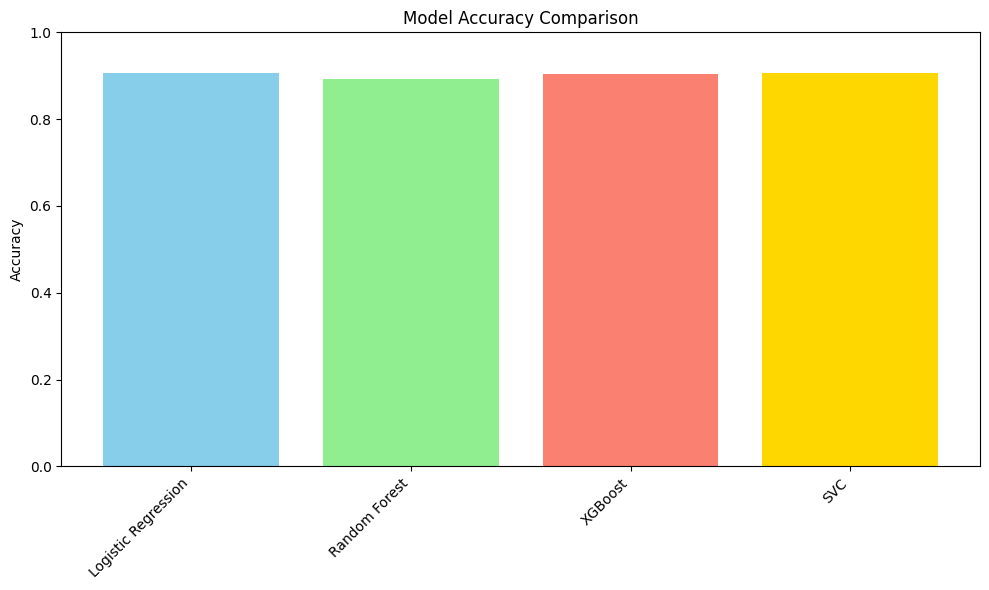

In [ ]:
# prompt: logistic, randome forest, xgboost, svc 등으로 예측해주고 정확도를 비교해줘

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xg = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=42)

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'XGBoost': xg,
    'SVC': svc
}

accuracy_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}\n")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

# Compare accuracies
print("Model Accuracy Comparison:")
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")

# You can also visualize the comparison
import matplotlib.pyplot as plt

names = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
